In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1/2014台苯致股東.txt',
 './letterto shareholders1/2015台苯致股東.txt',
 './letterto shareholders1/2013大同致股東.txt',
 './letterto shareholders1/2013智冠致股東.txt',
 './letterto shareholders1/2013榮剛致股東.txt',
 './letterto shareholders1/2015大同致股東.txt',
 './letterto shareholders1/2014大同致股東.txt',
 './letterto shareholders1/2014智冠致股東.txt',
 './letterto shareholders1/2015智冠致股東.txt',
 './letterto shareholders1/2015榮剛致股東.txt',
 './letterto shareholders1/2014榮剛致股東.txt',
 './letterto shareholders1/2013台苯致股東.txt',
 './letterto shareholders1/2016台紙致股東.txt',
 './letterto shareholders1/2017台紙致股東.txt',
 './letterto shareholders1/2017台苯致股東.txt',
 './letterto shareholders1/2016台苯致股東.txt',
 './letterto shareholders1/2013台紙致股東.txt',
 './letterto shareholders1/2015台紙致股東.txt',
 './letterto shareholders1/2014台紙致股東.txt',
 './letterto shareholders1/2016榮剛致股東.txt',
 './letterto shareholders1/2017榮剛致股東.txt',
 './letterto shareholders1/2016大同致股東.txt',
 './letterto shareholders1/2017大同致股東.txt',
 './lettert

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.644 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '',
 '',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 各位 股東 去 由 油價 崩跌 布蘭特 原油 由 七月 初 每桶 跌至 年底 在 短短 六個 時間 價格 腰 斬 嚴 重地 庫存 跌 價損 失重 創了 石化 產業 亦 深受其害 雖然本 下半年 即調 整產銷 策略 減少 生產 並壓 低 所有 原料 與 產品 庫存 努力 減少 損失 並出 脫手 中 台 蠟 股份 有限公司 股份 彌補 虧損 使 得以 安然 走出 此次 油價 風暴 在 產銷 策略 調整 下 去年 生產量 萬噸 較前 萬噸 減少 了 銷售量 萬噸 較 前年 萬噸 減少 了 使本 虧損 做 了 有效 控 制 年度 合 併 營收 新 台幣 億 萬餘元 較 前年 下降 營業 毛損 新 台幣 億 萬餘元 毛利率 毛利 由 去年 轉負數 營業淨 損新 台幣 億 萬餘元 佔營 收 稅後淨 損為 新 台幣 萬餘元 稅後純益 率 較 前年 減少 個 體營 收為 新 台幣 億 萬餘元 佔合 併 營收 茲 就 年度 合 併 財務 主要 營業 概況 說 明如次 一 生產 全年 生產 苯乙烯 公噸 預算產量 公噸 二 銷售 全年 銷售 苯乙烯 公噸 銷售值 新 台幣 億 萬餘元 加計 副 產品 後 銷售 總值 新 台幣 億 萬餘元 預算 銷售 總值 新 台幣 億 萬餘 三 獲利 能力 稅後淨 損為 新 台幣 萬餘元 預算 盈餘新 台幣 億 萬餘元 四 全 年度 稅後純益 率 預算 純益率 五 研究 發展 致力 產品 副 產品 高值化 應用 與 開發 及 製 程 改善 研究 此外 亦 投注 用 電子 醫療 器材 產業 低介電 薄膜 材料 新產品 發展 與 應用 展望 今 原油 價格 已 在 今年 元月 觸底 桶 目前 趨 穩定 並在 之間 盤整 美國 經濟 穩定 復 甦 歐盟 經濟 亦 逐漸 好轉 希臘 事件 亦 已 逐步 控制 中國大陸 今年 經濟 成長 率目 標將 控制 在 國際 貨幣 基金 組織 更 預測 今年 全球 成長 率 可達 優 去年 中國大陸 今年 第一季 需求 萬噸 較 去年 萬噸 成長 亦 今年 二月 起 轉虧 為盈 春節 後 即 恢 復 滿載 生產 以 提高 營收 與 獲利 今年 第一季 稅前 淨利為 新 台幣 萬元 由 今年 第一季 市場 淡季 不淡 顯示 市場 步出 谷底 今年 景氣 可期 此外 汽電 共生 廠將 今年 八月 完 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  4407


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (25, 4407)


<25x4407 sparse matrix of type '<class 'numpy.float64'>'
	with 11473 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
一本初衷 0.05345559195154376 0 10
一般 0.05345559195154376 0 22
並出 0.05345559195154376 0 102
並壓 0.05345559195154376 0 106
中國大陸 0.07396430902360183 0 150
主要 0.06152615121617422 0 181
事件 0.05345559195154376 0 255
事務性 0.05345559195154376 0 257
人力 0.05345559195154376 0 294
今年 0.27812069006750856 0 308
以不負 0.05345559195154376 0 346
佔合 0.07396430902360183 0 445
佔營 0.05345559195154376 0 447
價損 0.05345559195154376 0 565
全年 0.061804597792779685 0 631
公噸 0.11914807239434681 0 663
六個 0.05345559195154376 0 670
共生 0.08612402025442396 0 677
利益 0.05077670155873777 0 754
前年 0.12918603038163595 0 772
創了 0.05345559195154376 0 786
即調 0.05345559195154376 0 935
原油 0.07396430902360183 0 943
去年 0.13067371321152085 0 947
另將 0.05345559195154376 0 1005
可期 0.05345559195154376 0 1014
台幣 0.24610460486469687 0 1025
多產 0.05345559195154376 0 1394
大樓 0.10691118390308751 0 1419
失重 0.05345559195154376 0 1442
安然 0.05345559195154376 0 1489
就轉 0.05345559195154376 0 1648
崩跌 0.05345559195154376 0 1683
希臘 0.05345

面臨 0.05244279282591825 2 4287
領域 0.09156144970895981 2 4318
領域則 0.06255701520948019 2 4319
體營收 0.06255701520948019 2 4357
體質 0.05244279282591825 2 4360
----Document 3----
不同 0.0601825881872062 3 79
代理 0.09054130870980516 3 342
內容 0.10961850679763104 3 615
多元 0.06755226385009795 3 1383
市場 0.12537034088546348 3 1728
平台 0.22245047802888623 3 1755
年度 0.13204938664921745 3 1771
戲產品 0.09395872011225519 3 1966
手機 0.07829893342687932 3 1997
技術 0.08340951206383768 3 2018
投入 0.05905590799782948 3 2020
推出 0.12527829348300693 3 2086
提供 0.05610688314120552 3 2094
擴展 0.056293553208414955 3 2141
支付 0.21923701359526207 3 2150
收入 0.0645029197590228 3 2157
數位 0.18108261741961032 3 2226
新版 0.0601825881872062 3 2252
智冠 0.07829893342687932 3 2322
智慧型 0.050452263322673885 3 2334
服務 0.10421095431960524 3 2399
業者 0.055332700360262194 3 2510
淨利 0.09117125566879208 3 2708
營業 0.07127863064181174 3 2834
營運 0.10843236568298899 3 2842
環境 0.08684246193300436 3 2933
產品 0.07258282893368938 3 2968
產業 0.0641221521613777

指導 0.05123084404248426 6 2042
推動 0.05746593275479322 6 2087
擴大國際 0.0611113275488314 6 2127
支出 0.05554692780126959 6 2151
支持 0.07325064785583385 6 2152
改善 0.08619889913218982 6 2172
放態度 0.06895390851320607 6 2184
故結 0.0611113275488314 6 2196
整合 0.105819140642335 6 2214
整營 0.05554692780126959 6 2218
方案 0.09540869367378983 6 2278
智慧 0.12526302088647925 6 2333
更具 0.0611113275488314 6 2346
服務 0.07936435548175125 6 2399
期以 0.15944706349008095 6 2418
期經營 0.05123084404248426 6 2425
未來 0.14990641183086548 6 2431
未來營 0.05123084404248426 6 2433
機電 0.11109385560253918 6 2551
治理 0.0842798941786662 6 2667
淨利 0.05554692780126959 6 2708
照護 0.0611113275488314 6 2818
營業 0.0651407439931095 6 2834
理及 0.06895390851320607 6 2924
環保 0.06859473224991684 6 2926
環保節 0.0611113275488314 6 2931
產品 0.10050399429912979 6 2968
硬體 0.05123084404248426 6 3154
稅後淨損 0.20686172553961824 6 3187
策略 0.24008156287470897 6 3255
管理 0.15129545332219108 6 3258
節能 0.18911931665273884 6 3265
精神 0.05123084404248426 6 3280
精進 0.102461

航太 0.058815785138561845 10 3565
航空 0.0735197314232023 10 3571
認證 0.09649445497750839 10 3731
證產品 0.05136381253426881 10 3761
進入 0.05829238754609862 10 3950
重要 0.08154178094145485 10 4059
重點 0.05829238754609862 10 4063
鋼品 0.08822367770784276 10 4118
鋼廠 0.0735197314232023 10 4124
鋼材 0.09474552683759332 10 4127
鋼鐵 0.058815785138561845 10 4142
需求 0.12524054972337811 10 4269
飛機 0.10292762399248322 10 4340
----Document 11----
之因 0.05300134752472701 11 194
之轉 0.05300134752472701 11 235
乙基 0.05300134752472701 11 247
事故 0.05300134752472701 11 258
今年 0.09191911023669315 11 308
健全 0.07333578965021656 11 536
全年 0.0612794068244621 11 631
全球 0.08920409612068189 11 637
公噸 0.11813559931388498 11 663
具開源 0.05300134752472701 11 703
利為 0.07875706620925665 11 752
前年 0.2988726036658985 11 772
動態 0.05300134752472701 11 831
十二月 0.05300134752472701 11 899
去年 0.32390824951244007 11 947
可行性 0.08539217247597101 11 1020
台幣 0.20334442125489552 11 1025
周全 0.05300134752472701 11 1110
嚴峻且 0.05300134752472701 11 1178


數下 0.06339608168061533 13 2225
新設 0.06339608168061533 13 2262
方面 0.05067786512079937 13 2281
普稅 0.06339608168061533 13 2316
更乾淨 0.06339608168061533 13 2345
更加 0.05618562887054564 13 2347
有助 0.05618562887054564 13 2388
期為 0.05618562887054564 13 2424
未來 0.08269418804931762 13 2431
束手 0.06339608168061533 13 2454
根據 0.051069731186044354 13 2481
正式 0.06021903045069553 13 2582
正陽 0.06339608168061533 13 2590
母公司 0.05618562887054564 13 2606
氛圍 0.05618562887054564 13 2623
汰換 0.06339608168061533 13 2650
油管 0.06339608168061533 13 2666
法案 0.051069731186044354 13 2669
流程 0.10213946237208871 13 2688
消化 0.051069731186044354 13 2694
溝通 0.06339608168061533 13 2751
溫和通 0.06339608168061533 13 2752
漲幅 0.06339608168061533 13 2760
漿紙 0.05618562887054564 13 2766
無策 0.06339608168061533 13 2808
無論 0.05618562887054564 13 2810
然而 0.06339608168061533 13 2816
營運 0.07008296630684789 13 2842
牽絆 0.06339608168061533 13 2876
獲利均 0.06339608168061533 13 2885
獲益 0.06339608168061533 13 2891
球場 0.09420306530882645 13 2920
產

低價廝 0.06128552994716178 17 433
住宿 0.06128552994716178 17 444
供過 0.054315124049674854 17 477
依照 0.06128552994716178 17 482
侵蝕 0.06128552994716178 17 489
促銷 0.06128552994716178 17 493
傾倒 0.06128552994716178 17 550
價以 0.06128552994716178 17 562
價格 0.10658823077183575 17 566
先生 0.06395794661653016 17 598
內難 0.06128552994716178 17 625
兩項 0.054315124049674854 17 657
出租 0.14810862708031536 17 723
分廠 0.054315124049674854 17 732
分照 0.054315124049674854 17 736
別墅 0.09106690235500502 17 747
削價 0.06128552994716178 17 769
加上 0.051075134371983605 17 808
包含 0.07949822226103523 17 858
化工 0.13660035353250752 17 867
南美洲 0.054315124049674854 17 920
去年底 0.06128552994716178 17 949
台紙 0.054315124049674854 17 1038
各項 0.05329411538591788 17 1074
售量 0.054315124049674854 17 1126
單量 0.06128552994716178 17 1171
嚴加 0.06128552994716178 17 1176
嚴肅 0.06128552994716178 17 1180
因新紙 0.06128552994716178 17 1218
因為 0.09873908472021023 17 1223
困境 0.10863024809934971 17 1235
國內 0.055666247086921916 17 1241
國家 0.067234927180

衝擊 0.09358672353301979 18 3643
要務 0.0580875543255433 18 3664
規劃 0.06716000704118598 18 3671
詳細 0.1161751086510866 18 3728
調漲 0.05148087520258485 18 3743
起可購 0.0580875543255433 18 3822
起始 0.0580875543255433 18 3824
起展 0.0580875543255433 18 3825
越公 0.0580875543255433 18 3837
越南 0.15931625656827925 18 3838
越南政府 0.0580875543255433 18 3839
連帶 0.05148087520258485 18 3946
進展 0.05148087520258485 18 3956
部分 0.0863148877453785 18 4036
釋出 0.0580875543255433 18 4045
金額 0.05148087520258485 18 4068
鉀價格 0.05148087520258485 18 4072
開發 0.05932220439394818 18 4176
開發許 0.05148087520258485 18 4180
開跌勢 0.0580875543255433 18 4182
閒置 0.05148087520258485 18 4183
需求 0.057048202439535185 18 4269
需面 0.0580875543255433 18 4274
高爾夫 0.1403800852995297 18 4379
龍井 0.1029617504051697 18 4404
----Document 19----
主要 0.08611723682368527 19 181
之淨現 0.05823379176680654 19 217
人才 0.05459407086111386 19 301
仟元 0.05459407086111386 19 338
以及 0.07320341198425342 19 352
以長 0.056115746483154066 19 389
位化 0.056115746483154066 19 4

將氣候 0.061056539808804974 22 1579
將盡 0.061056539808804974 22 1589
小額 0.054112178463959514 22 1640
尚志 0.061056539808804974 22 1641
已經 0.13608995354278783 22 1718
帶來 0.09837015135713417 22 1746
年度 0.07632644225427396 22 1771
廠商 0.08448142866744326 22 1793
建置 0.08448142866744326 22 1826
微電 0.061056539808804974 22 1867
成果 0.050884294836182634 22 1939
成為 0.07059270597775234 22 1940
我們 0.21644871385583805 22 1946
扮演 0.061056539808804974 22 2011
承先啟 0.061056539808804974 22 2015
投資者 0.061056539808804974 22 2031
挑戰 0.08318737965225406 22 2047
挺生 0.061056539808804974 22 2049
提供者 0.061056539808804974 22 2095
既定 0.061056539808804974 22 2287
晶片 0.061056539808804974 22 2320
智慧 0.08318737965225406 22 2333
會持 0.061056539808804974 22 2377
未來 0.13273746186256302 22 2431
本業營 0.061056539808804974 22 2447
東獲取 0.061056539808804974 22 2465
林蔚山 0.061056539808804974 22 2469
業虧 0.061056539808804974 22 2511
構建 0.061056539808804974 22 2526
機會 0.06698370743471613 22 2539
正在 0.054112178463959514 22 2581
氣候 0.0610565

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1/2014台苯致股東.txt,./letterto shareholders1/2015台苯致股東.txt,./letterto shareholders1/2013大同致股東.txt,./letterto shareholders1/2013智冠致股東.txt,./letterto shareholders1/2013榮剛致股東.txt,./letterto shareholders1/2015大同致股東.txt,./letterto shareholders1/2014大同致股東.txt,./letterto shareholders1/2014智冠致股東.txt,./letterto shareholders1/2015智冠致股東.txt,...,./letterto shareholders1/2016台苯致股東.txt,./letterto shareholders1/2013台紙致股東.txt,./letterto shareholders1/2015台紙致股東.txt,./letterto shareholders1/2014台紙致股東.txt,./letterto shareholders1/2016榮剛致股東.txt,./letterto shareholders1/2017榮剛致股東.txt,./letterto shareholders1/2016大同致股東.txt,./letterto shareholders1/2017大同致股東.txt,./letterto shareholders1/2017智冠致股東.txt,./letterto shareholders1/2016智冠致股東.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.015652,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.019411,0.000000,0.000000,0.042241,0.000000,0.000000
1,一個樂,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.046017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,一個環,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.022602,0.019897,0.000000,0.000000,0.000000,0.000000
3,一元,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018056
4,一國國,0.000000,0.000000,0.000000,0.000000,0.020051,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一大,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,一定,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.028058,0.000000,0.000000,0.000000,0.000000,0.000000
7,一家,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.061286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一年,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.061286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一方面,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1/2014台苯致股東.txt,./letterto shareholders1/2015台苯致股東.txt,./letterto shareholders1/2013大同致股東.txt,./letterto shareholders1/2013智冠致股東.txt,./letterto shareholders1/2013榮剛致股東.txt,./letterto shareholders1/2015大同致股東.txt,./letterto shareholders1/2014大同致股東.txt,./letterto shareholders1/2014智冠致股東.txt,./letterto shareholders1/2015智冠致股東.txt,...,./letterto shareholders1/2016台苯致股東.txt,./letterto shareholders1/2013台紙致股東.txt,./letterto shareholders1/2015台紙致股東.txt,./letterto shareholders1/2014台紙致股東.txt,./letterto shareholders1/2016榮剛致股東.txt,./letterto shareholders1/2017榮剛致股東.txt,./letterto shareholders1/2016大同致股東.txt,./letterto shareholders1/2017大同致股東.txt,./letterto shareholders1/2017智冠致股東.txt,./letterto shareholders1/2016智冠致股東.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.015652,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.019411,0.000000,0.000000,0.042241,0.000000,0.000000
1,一個樂,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.046017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,一個環,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.022602,0.019897,0.000000,0.000000,0.000000,0.000000
3,一元,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018056
4,一國國,0.000000,0.000000,0.000000,0.000000,0.020051,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一大,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,一定,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.028058,0.000000,0.000000,0.000000,0.000000,0.000000
7,一家,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.061286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一年,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.061286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一方面,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04224071, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0268306 ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一個,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,一個樂,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,一個環,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,一元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,一國國,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一大,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一定,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,一家,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,一年,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,一方面,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一個,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,一個樂,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,一個環,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,一元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,一國國,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一個,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,一個樂,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,一個環,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,一元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,一國國,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一大,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一定,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,一家,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,一年,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,一方面,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一個': 7,
 '一個樂': 1,
 '一個環': 3,
 '一元': 1,
 '一國國': 2,
 '一大': 1,
 '一定': 1,
 '一家': 1,
 '一年': 1,
 '一方面': 1,
 '一本初衷': 1,
 '一枝': 2,
 '一極': 1,
 '一次性': 1,
 '一步': 6,
 '一波': 2,
 '一消': 1,
 '一環': 3,
 '一生': 5,
 '一直': 10,
 '一級': 1,
 '一致': 1,
 '一般': 1,
 '一路': 2,
 '一部': 3,
 '一重': 1,
 '一長': 1,
 '一頁': 2,
 '一項': 4,
 '七十年': 2,
 '七年': 1,
 '七月': 2,
 '七號': 1,
 '三價鉻': 2,
 '三國': 2,
 '三國人': 1,
 '三國志': 1,
 '三大網': 4,
 '三家': 5,
 '三方': 3,
 '三月': 1,
 '三期': 2,
 '上中下游': 3,
 '上任': 1,
 '上價': 1,
 '上千': 2,
 '上升': 4,
 '上半年': 5,
 '上市': 8,
 '上市公司': 1,
 '上架': 1,
 '上海': 1,
 '上游': 1,
 '上漲': 2,
 '上班族': 1,
 '上線': 4,
 '上述': 4,
 '上遊': 6,
 '上遊戲': 1,
 '下亦步': 1,
 '下半年': 5,
 '下同': 3,
 '下單': 2,
 '下成': 4,
 '下探': 1,
 '下推': 1,
 '下旬': 1,
 '下游': 7,
 '下滑': 1,
 '下能': 1,
 '下調': 1,
 '下跌': 10,
 '下遊': 3,
 '下降': 3,
 '下頁': 1,
 '不僅': 4,
 '不利': 2,
 '不到': 1,
 '不可或缺': 1,
 '不同': 4,
 '不好': 2,
 '不如': 1,
 '不懈': 3,
 '不振': 1,
 '不斷': 3,
 '不明': 1,
 '不淡': 2,
 '不確': 2,
 '不論': 1,
 '不負': 3,
 '不足': 2,
 '不跌': 1,
 '不錯': 3,
 '世人': 1,
 '世代': 2,
 '世界': 23,
 '世界各地': 1,
 '

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"/Users/liangpeiru/Downloads/碩二/資本市場/wqy-microhei.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('市場', 304),
 ('產品', 210),
 ('遊戲', 201),
 ('發展', 186),
 ('全球', 170),
 ('成長', 167),
 ('需求', 159),
 ('產業', 144),
 ('經濟', 143),
 ('經營', 136)]

In [21]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x1a10d7a748>,
 <a list of 10 Text xticklabel objects>)

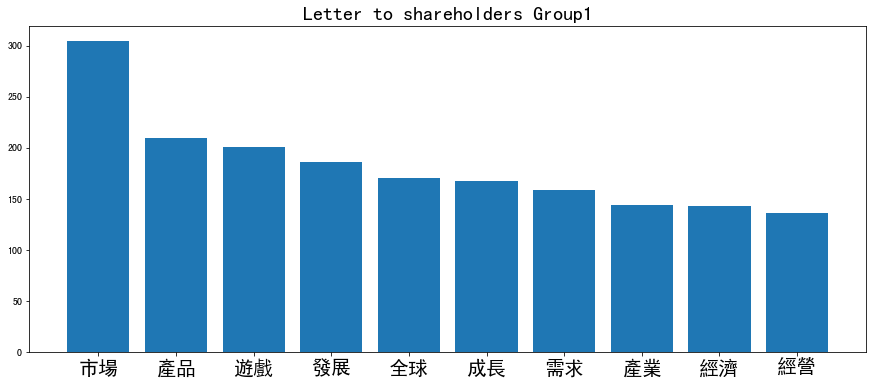

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-3.21800148e-01, -1.38010891e-01],
       [-3.00345142e-01, -1.07533578e-01],
       [-1.72247269e-01, -4.71614508e-01],
       [ 6.13872312e-01, -8.60374580e-02],
       [-1.03480116e-01,  5.93060744e-01],
       [-1.72187375e-01, -4.73439259e-01],
       [-1.63898968e-01, -4.74182287e-01],
       [ 7.51029405e-01, -4.92578276e-02],
       [ 7.63515284e-01, -5.24706309e-02],
       [-1.10122637e-01,  6.22523465e-01],
       [-1.00594564e-01,  6.09727977e-01],
       [-3.00530428e-01, -1.25792064e-01],
       [-1.50018267e-01, -1.31294794e-02],
       [-1.41003775e-01, -1.31138046e-02],
       [-2.45289530e-01, -1.11890854e-01],
       [-3.03588850e-01, -1.13422935e-01],
       [-1.80277790e-01,  7.31511017e-04],
       [-1.72580532e-01, -2.01991208e-03],
       [-1.65498283e-01, -6.58965246e-03],
       [-9.37290605e-02,  6.20662375e-01],
       [-1.12354798e-01,  5.62470766e-01],
       [-1.64012974e-01, -4.38210153e-01],
       [-1.22946818e-01, -2.24829783e-01],
       [ 7.

No handles with labels found to put in legend.


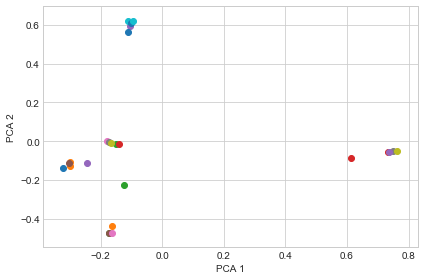

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

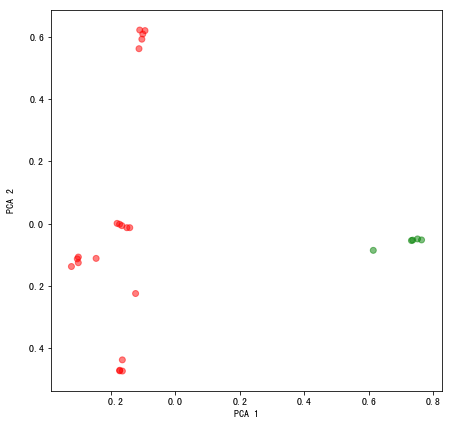

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()